# 分水岭算法
1. 找到极小值区域
2. 被水淹没

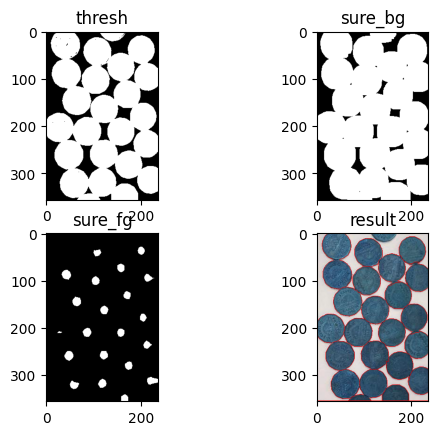

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('../data/coins.png')
#应用分水岭算法
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
#去除噪声
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
#确定背景区域
sure_bg = cv.dilate(opening,kernel,iterations=3)
#确定前景区域
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
#找到未知区域
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
#标记标签
ret, markers = cv.connectedComponents(sure_fg)
#为所有标签加1，保证背景是0而不是1
markers = markers+1
#现在让所有未知区域为0
markers[unknown==255] = 0
#应用分水岭算法
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(221),plt.imshow(thresh,'gray'),plt.title('thresh')
plt.subplot(222),plt.imshow(sure_bg,'gray'),plt.title('sure_bg')
plt.subplot(223),plt.imshow(sure_fg,'gray'),plt.title('sure_fg')
plt.subplot(224),plt.imshow(img,'gray'),plt.title('result')
plt.show()

